1. Given the data of breast cancer patients.Find out whether the cancer is benign or malignant with the help of K Nearest Neighbors Leaening Model

#### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/hackthebox/Downloads/Machine-Learning-Self-Study/KNN_CLASSIFIER/Data/breast-cancer-wisconsin.data")

In [4]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [13]:
df.tail()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [33]:
df['class'].unique()

array([2, 4])

In [5]:
df.columns

Index(['id', ' clump_thickness', ' unif_cell_size', ' unif_cell_shape',
       ' marg_adhesion', ' single_epith_cell_size', ' bare_nulei',
       ' bland_chrom', ' norm_nucleoli', ' mitoses', ' class'],
      dtype='object')

- Observe that the columns names have spaces before them.These spaces can be removed using replace() method of string class.First convert the columns names into string using '.str' property and then apply remove() method as:

In [7]:
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nulei', 'bland_chrom',
       'norm_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [12]:
df[df['bare_nulei']=='?']

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


- Remove the '?'

In [14]:
df = df[df['bare_nulei']!='?']

- remove unwanted column - id

In [15]:
df.drop(['id'],axis='columns',inplace=True)

In [16]:
df

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


- divide the data 0 to 8 -independent and last column - dependent or target

In [17]:
x = df.iloc[:,:9]
y = df.iloc[:,9]

- We can split the data into train and test

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

- Let us first decide the k value that is to be passed to the KNN model.
- k value should be the square root of the number of test records and it should be an odd number.

In [19]:
import math
k = math.sqrt(len(x_test))
print("K value is:",k)

K value is: 11.704699910719626


In [23]:
# See the k value is even ,convert it to odd
k = int(k)
if k%2 == 0:
    k = k+1
print("K value is:",k)


K value is: 11


- Create KNN Classifier
- default k value = 5 and distance = minkowski

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [27]:
# Accuracy 
model.score(x_test,y_test)

0.9562043795620438

- Take k values from 1 to 15

In [28]:
k_range = range(1,16)
scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    accuracy = model.score(x_test,y_test)
    scores.append(accuracy)
    print('k= %d Accuracy= %.2f%%' %(k,accuracy*100))

k= 1 Accuracy= 97.08%
k= 2 Accuracy= 94.89%
k= 3 Accuracy= 97.08%
k= 4 Accuracy= 97.08%
k= 5 Accuracy= 97.08%
k= 6 Accuracy= 95.62%
k= 7 Accuracy= 97.08%
k= 8 Accuracy= 96.35%
k= 9 Accuracy= 96.35%
k= 10 Accuracy= 94.89%
k= 11 Accuracy= 95.62%
k= 12 Accuracy= 94.89%
k= 13 Accuracy= 94.89%
k= 14 Accuracy= 94.16%
k= 15 Accuracy= 95.62%


- Highest accuracy - 1,3,4,5,7 
- We can not take k = 1 as it indicates only 1 neighbour to assess the new data point.

Text(0, 0.5, 'Testing Accuracy')

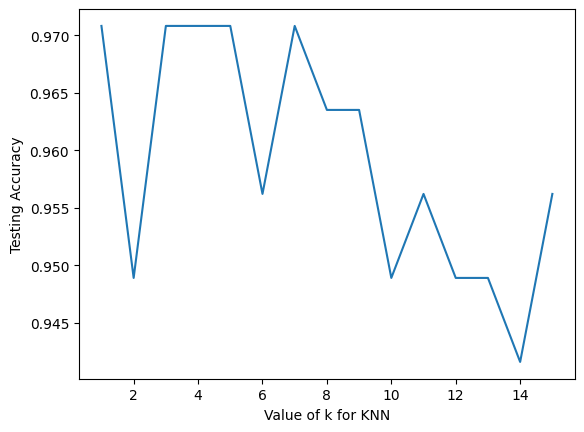

In [29]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [30]:
# take k = 3 
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
accuracy

0.9708029197080292

- Test data - clump_thickness =4,unif_cell_size=2,unif_cell_shape=1,marg_adhesion=1,single_epith_cell_size=1,bare_nulei=2,bland_chrom=3,	norm_nucleoli=2	mitoses=1,class =?

In [38]:
model.predict([[4,2,1,1,1,2,3,4,1]])

array([2])

- benign cancer - 2
- malignant cancer - 4